In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
accounts = pd.read_csv("./processed/account.csv", sep=";");
#df_card_dev = pd.read_csv("./processed/card_dev.csv", sep=";");
#df_client = pd.read_csv("./processed/client.csv", sep=";");
#df_disp = pd.read_csv("./processed/disp.csv", sep=";");
#df_loan_dev = pd.read_csv("./processed/loan_dev.csv", sep=";");
#df_trans_dev = pd.read_csv("./processed/trans_dev.csv", sep=";", low_memory=False); # see here
#df_district = pd.read_csv("./raw/district.csv", sep=";");

#df_loan_dev['date'] = [datetime.strptime(d, "%Y-%m-%d") for d in df_loan_dev['date']]

In [3]:
accounts.head()

,account_id,district_id,frequency,date
0,576,55,monthly issuance,1993-01-01
1,3818,74,monthly issuance,1993-01-01
2,704,55,monthly issuance,1993-01-01
3,2378,16,monthly issuance,1993-01-01
4,2632,24,monthly issuance,1993-01-02


In [4]:
accounts.shape

(4500, 4)

In [5]:
transactions = pd.read_csv("./processed/trans_dev.csv", sep=";", low_memory=False);

In [6]:
transactions.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,1993-01-13,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,1993-01-14,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,1993-01-14,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,1993-01-17,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,1993-01-19,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


In [7]:
accounts = accounts.rename(columns={"date": "account_date"})
transactions = transactions.rename(columns={"date": "transaction_date", "amount": "transaction_amount", "account": "bank_account"})

In [8]:
all_join = accounts
all_join.head()

,account_id,district_id,frequency,account_date
0,576,55,monthly issuance,1993-01-01
1,3818,74,monthly issuance,1993-01-01
2,704,55,monthly issuance,1993-01-01
3,2378,16,monthly issuance,1993-01-01
4,2632,24,monthly issuance,1993-01-02


In [9]:
transactions.groupby('account_id').size()

account_id
1        113
2         54
4         39
6        124
7          4
        ... 
11333    208
11349     18
11359    147
11362    107
11382     99
Length: 3370, dtype: int64

In [10]:
temp = transactions.groupby('account_id').size()
temp_pd = pd.DataFrame(temp)

In [11]:
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join.head()
all_join.shape

(4500, 5)

In [12]:
all_join = all_join.rename(columns={0: "# transactions"})
all_join.head()

,account_id,district_id,frequency,account_date,# transactions
0,576,55,monthly issuance,1993-01-01,229.0
1,3818,74,monthly issuance,1993-01-01,366.0
2,704,55,monthly issuance,1993-01-01,320.0
3,2378,16,monthly issuance,1993-01-01,307.0
4,2632,24,monthly issuance,1993-01-02,368.0


In [13]:
temp = transactions[transactions['operation']=='credit in cash'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)

In [14]:
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# credit in cash transactions"})
# all_join.head()

In [15]:
temp = transactions[transactions['operation']=='credit card withdrawal'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# credit card withdrawal transactions"})
# all_join.head()

In [16]:
temp = transactions[transactions['operation']=='collection from another bank'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# collection from another bank withdrawal transactions"})
# all_join.head()

In [17]:
temp = transactions[transactions['operation']=='remittance to another bank'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# remittance to another bank withdrawal transactions"})
# all_join.head()

In [18]:
temp = transactions[transactions['operation']=='withdrawal in cash'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# withdrawal in cash transactions"})
# all_join.head()

In [19]:
temp = transactions[transactions['type']=='withdrawal'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# type = withdrawal transactions"})
# all_join.head()

In [20]:
temp = transactions[transactions['type']=='withdrawal in cash'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# type = withdrawal in cash transactions"})
# all_join.head()

In [21]:
temp = transactions[transactions['type']=='credit'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# type = credit transactions"})
all_join.head()

,account_id,district_id,frequency,account_date,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,# type = withdrawal in cash transactions,# type = credit transactions
0,576,55,monthly issuance,1993-01-01,229.0,1.0,NaN,48.0,44.0,88.0,132.0,NaN,97.0
1,3818,74,monthly issuance,1993-01-01,366.0,53.0,NaN,NaN,132.0,133.0,265.0,NaN,101.0
2,704,55,monthly issuance,1993-01-01,320.0,50.0,NaN,NaN,86.0,136.0,222.0,NaN,98.0
3,2378,16,monthly issuance,1993-01-01,307.0,84.0,NaN,NaN,47.0,128.0,164.0,11.0,132.0
4,2632,24,monthly issuance,1993-01-02,368.0,50.0,NaN,NaN,130.0,140.0,270.0,NaN,98.0


In [22]:
temp = transactions.groupby('account_id').transaction_amount.mean().round(2)
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={'transaction_amount': "avg transaction amount"})

In [23]:
all_join.shape

(4500, 14)

In [24]:
temp = transactions.groupby('account_id').balance.mean().round(2)
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={'balance': "avg balance"})
all_join

,account_id,district_id,frequency,account_date,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,# type = withdrawal in cash transactions,# type = credit transactions,avg transaction amount,avg balance
0,576,55,monthly issuance,1993-01-01,229.0,1.0,NaN,48.0,44.0,88.0,132.0,NaN,97.0,2480.36,24283.20
1,3818,74,monthly issuance,1993-01-01,366.0,53.0,NaN,NaN,132.0,133.0,265.0,NaN,101.0,4908.71,42826.89
2,704,55,monthly issuance,1993-01-01,320.0,50.0,NaN,NaN,86.0,136.0,222.0,NaN,98.0,5622.88,34748.26
3,2378,16,monthly issuance,1993-01-01,307.0,84.0,NaN,NaN,47.0,128.0,164.0,11.0,132.0,13644.92,57997.03
4,2632,24,monthly issuance,1993-01-02,368.0,50.0,NaN,NaN,130.0,140.0,270.0,NaN,98.0,4028.79,32355.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,55,monthly issuance,1997-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4496,3958,59,monthly issuance,1997-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4497,777,30,monthly issuance,1997-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4498,1573,63,monthly issuance,1997-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


k_symbol, bank and (bank_)account columns were skipped due to the fact that they seem to be other identifiers of an account (which is redundant)

#### Exporting join of accounts and transactions files

In [25]:
all_join.to_csv("./processed/all_join_1.csv", sep=";")

#### Loans dataset

In [26]:
loans = pd.read_csv("./processed/loan_dev.csv", sep=";");

In [27]:
loans.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033,-1
1,5316,1801,1993-07-11,165960,36,4610,1
2,6863,9188,1993-07-28,127080,60,2118,1
3,5325,1843,1993-08-03,105804,36,2939,1
4,7240,11013,1993-09-06,274740,60,4579,1


In [28]:
loans.shape

(328, 7)

In [29]:
loans.rename(columns={'date': "loan date", 'amount': "loan amount", 'duration': "loan duration", 'payments': "loan payments", 'status': "loan status"})

,loan_id,account_id,loan date,loan amount,loan duration,loan payments,loan status
0,5314,1787,1993-07-05,96396,12,8033,-1
1,5316,1801,1993-07-11,165960,36,4610,1
2,6863,9188,1993-07-28,127080,60,2118,1
3,5325,1843,1993-08-03,105804,36,2939,1
4,7240,11013,1993-09-06,274740,60,4579,1
...,...,...,...,...,...,...,...
323,6818,9030,1996-12-12,155616,48,3242,1
324,5625,3189,1996-12-15,222180,60,3703,-1
325,6805,8972,1996-12-21,45024,48,938,1
326,7233,10963,1996-12-25,115812,36,3217,1


In [30]:
loans.account_id.nunique()

328

Therefore, there is at max 1 loan per account in this data. No need for average loan values, loan durations, etc

In [31]:
all_join_only_loan_accounts = pd.merge(all_join, loans)
all_join_only_loan_accounts.shape

(328, 21)

In [32]:
all_join_only_loan_accounts.head()

,account_id,district_id,frequency,account_date,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,...,# type = withdrawal in cash transactions,# type = credit transactions,avg transaction amount,avg balance,loan_id,date,amount,duration,payments,status
0,5270,44,monthly issuance,1993-01-13,53.0,1.0,NaN,11.0,NaN,31.0,...,3.0,22.0,17600.36,69954.57,6077,1993-11-22,79608,24,3317,1
1,11265,15,monthly issuance,1993-01-14,43.0,14.0,NaN,NaN,8.0,14.0,...,NaN,21.0,3714.90,22198.18,7284,1993-09-15,52788,12,4399,1
2,10364,55,monthly issuance,1993-01-17,45.0,12.0,NaN,NaN,5.0,19.0,...,NaN,21.0,5957.54,34272.21,7121,1993-11-10,21924,36,609,1
3,3834,54,monthly issuance,1993-01-19,171.0,29.0,NaN,NaN,61.0,62.0,...,NaN,48.0,3618.33,23771.97,5754,1994-09-28,23052,12,1921,1
4,9307,68,monthly issuance,1993-01-24,143.0,26.0,NaN,NaN,30.0,50.0,...,4.0,63.0,6720.90,36080.39,6895,1994-09-19,41904,12,3492,1


In [33]:
all_join_only_loan_accounts = all_join_only_loan_accounts.drop(columns=['account_date', 'date', 'loan_id'])

### Some Analysis

In [34]:
temp_all_join_only_loan_accounts = all_join_only_loan_accounts.drop(columns=['account_id', 'district_id'])

In [35]:
temp_all_join_only_loan_accounts.columns

Index(['frequency', '# transactions', '# credit in cash transactions',
       '# credit card withdrawal transactions',
       '# collection from another bank withdrawal transactions',
       '# remittance to another bank withdrawal transactions',
       '# withdrawal in cash transactions', '# type = withdrawal transactions',
       '# type = withdrawal in cash transactions',
       '# type = credit transactions', 'avg transaction amount', 'avg balance',
       'amount', 'duration', 'payments', 'status'],
      dtype='object')

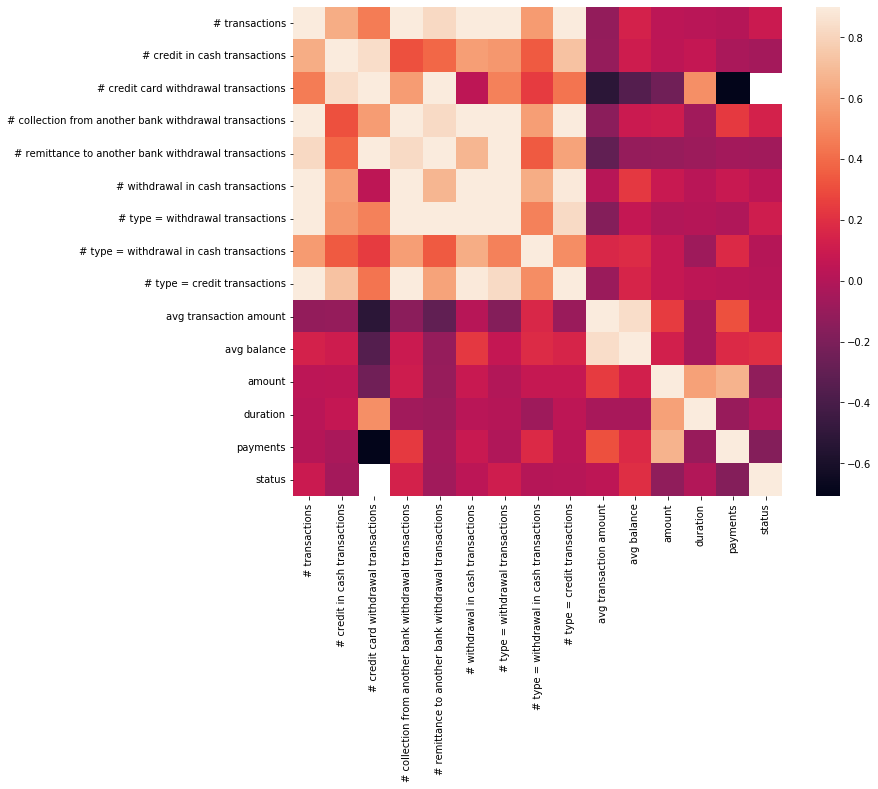

In [36]:
#correlation matrix
corrmat = temp_all_join_only_loan_accounts.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

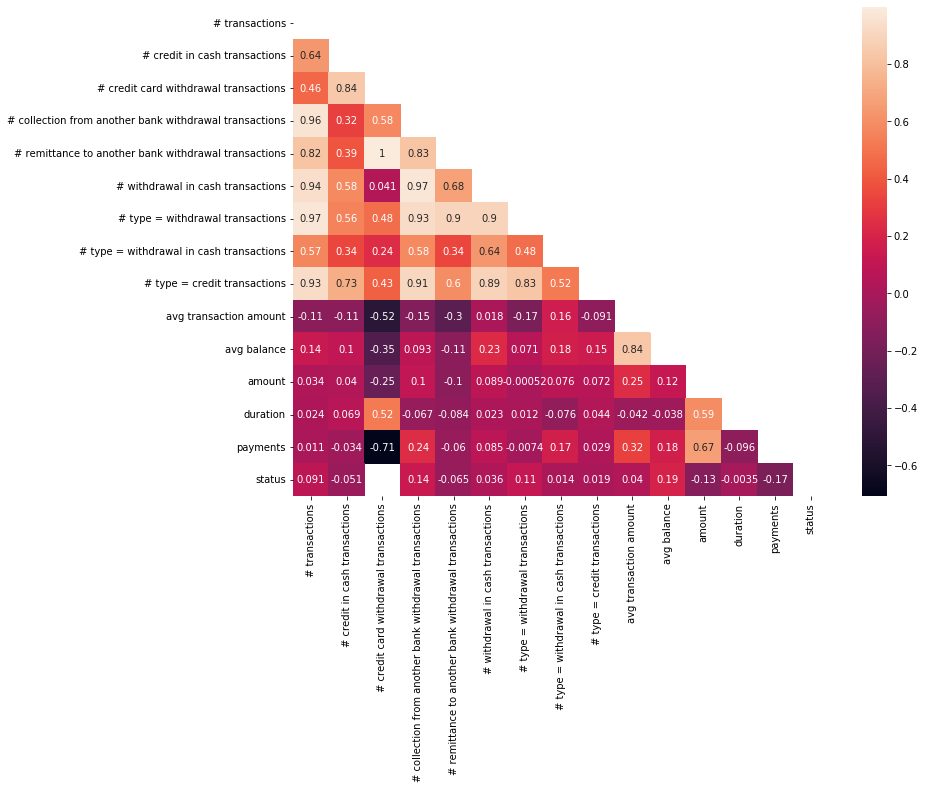

In [37]:
corrmat = temp_all_join_only_loan_accounts.corr()
f, ax = plt.subplots(figsize=(12, 9))
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corrmat)

# using the upper triangle matrix as mask 
sns.heatmap(corrmat, annot=True, mask=matrix)

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


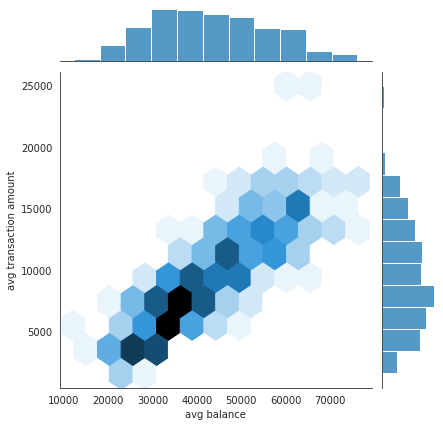

In [38]:
with sns.axes_style('white'):
    sns.jointplot("avg balance", "avg transaction amount", temp_all_join_only_loan_accounts, kind='hex')

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


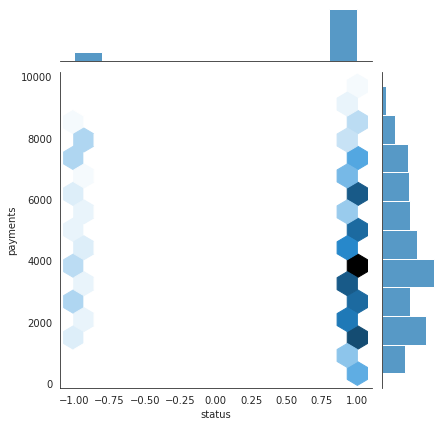

In [39]:
with sns.axes_style('white'):
    sns.jointplot("status", "payments", temp_all_join_only_loan_accounts, kind='hex')

#### Districts dataset

In [40]:
districts = pd.read_csv("./raw/district.csv", sep=";");

In [41]:
districts = districts.rename(columns={"code ": "district_id", "name ": "district_name", "region": "district_region"})

In [42]:
districts.head()

,district_id,district_name,district_region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [43]:
districts.shape

(77, 16)

In [44]:
all_join_only_loan_accounts.shape

(328, 18)

In [45]:
all_join_loan_accounts_district = pd.merge(all_join_only_loan_accounts, districts)

In [68]:
all_join_loan_accounts_district[all_join_loan_accounts_district['status'] == -1]

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,payments,status,district_name,district_region,no. of inhabitants,ratio of urban inhabitants,average salary,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant
3,3037,44,monthly issuance,117.0,26.0,0.0,0.0,0.0,71.0,70.0,...,7719,-1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
6,5927,15,monthly issuance,33.0,3.0,0.0,6.0,0.0,12.0,11.0,...,1817,-1,Cesky Krumlov,south Bohemia,58796,51.9,9045,124,1862.0,3.365
16,790,54,monthly issuance,64.0,16.0,0.0,0.0,0.0,35.0,34.0,...,4336,-1,Brno - mesto,south Moravia,387570,100.0,9897,140,18708.5,1.780
17,10266,54,monthly issuance,23.0,6.0,0.0,0.0,0.0,8.0,8.0,...,3151,-1,Brno - mesto,south Moravia,387570,100.0,9897,140,18708.5,1.780
27,1993,68,monthly issuance,14.0,4.0,0.0,0.0,0.0,5.0,5.0,...,5700,-1,Frydek - Mistek,north Moravia,228848,57.2,9893,96,5755.0,4.405
30,6473,12,monthly issuance,102.0,26.0,0.0,0.0,0.0,60.0,52.0,...,6409,-1,Pribram,central Bohemia,107870,58.0,8754,137,3836.0,4.070
43,3678,1,monthly issuance,139.0,38.0,0.0,0.0,0.0,79.0,79.0,...,5269,-1,Hl.m. Praha,Prague,1204953,100.0,12541,167,92392.0,0.360
53,11021,1,monthly issuance,160.0,36.0,0.0,0.0,0.0,86.0,78.0,...,7041,-1,Hl.m. Praha,Prague,1204953,100.0,12541,167,92392.0,0.360
54,10451,1,monthly issuance,130.0,26.0,0.0,0.0,34.0,40.0,74.0,...,8049,-1,Hl.m. Praha,Prague,1204953,100.0,12541,167,92392.0,0.360
60,10131,1,monthly issuance,15.0,3.0,0.0,0.0,0.0,5.0,5.0,...,5983,-1,Hl.m. Praha,Prague,1204953,100.0,12541,167,92392.0,0.360


In [46]:
all_join_loan_accounts_district = all_join_loan_accounts_district.drop(columns=['no. of cities ', 'no. of municipalities with inhabitants < 499 ', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999 ', 'no. of municipalities with inhabitants >10000 '])



In [47]:
all_join_loan_accounts_district.columns

Index(['account_id', 'district_id', 'frequency', '# transactions',
       '# credit in cash transactions',
       '# credit card withdrawal transactions',
       '# collection from another bank withdrawal transactions',
       '# remittance to another bank withdrawal transactions',
       '# withdrawal in cash transactions', '# type = withdrawal transactions',
       '# type = withdrawal in cash transactions',
       '# type = credit transactions', 'avg transaction amount', 'avg balance',
       'amount', 'duration', 'payments', 'status', 'district_name',
       'district_region', 'no. of inhabitants', 'ratio of urban inhabitants ',
       'average salary ', 'unemploymant rate '95 ', 'unemploymant rate '96 ',
       'no. of enterpreneurs per 1000 inhabitants ',
       'no. of commited crimes '95 ', 'no. of commited crimes '96 '],
      dtype='object')

In [48]:
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["no. of commited crimes '95 "] == '?', "no. of commited crimes '95 "] = -1



In [49]:
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["no. of commited crimes '96 "] == '?', "no. of commited crimes '96 "] = -1





In [50]:
# Fix
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["no. of commited crimes '95 "].astype('int') == -1, 'crimes'] = all_join_loan_accounts_district["no. of commited crimes '96 "].astype('int')
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["no. of commited crimes '95 "].astype('int') != -1, 'crimes'] = (all_join_loan_accounts_district["no. of commited crimes '95 "].astype('int') + all_join_loan_accounts_district["no. of commited crimes '96 "].astype('int')) / 2.0



In [51]:
all_join_loan_accounts_district = all_join_loan_accounts_district.drop(columns=["no. of commited crimes '95 ", "no. of commited crimes '96 "])

In [52]:
all_join_loan_accounts_district

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,status,district_name,district_region,no. of inhabitants,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,crimes
0,5270,44,monthly issuance,53.0,1.0,NaN,11.0,NaN,31.0,28.0,...,1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
1,5385,44,weekly issuance,56.0,3.0,NaN,10.0,6.0,27.0,32.0,...,1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
2,8027,44,weekly issuance,60.0,2.0,NaN,10.0,NaN,38.0,33.0,...,1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
3,3037,44,monthly issuance,117.0,26.0,NaN,NaN,NaN,71.0,70.0,...,-1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
4,10942,44,weekly issuance,130.0,40.0,NaN,NaN,12.0,62.0,72.0,...,1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,NaN,NaN,NaN,3.0,3.0,...,-1,Opava,north Moravia,182027,56.4,8746,3.33,3.74,90,4394.0
324,5001,53,monthly issuance,82.0,27.0,NaN,NaN,6.0,39.0,41.0,...,1,Blansko,south Moravia,107911,50.9,8240,2.53,3.56,99,1876.5
325,3084,59,weekly issuance,29.0,8.0,NaN,NaN,NaN,15.0,13.0,...,-1,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0
326,11054,59,weekly issuance,31.0,3.0,NaN,7.0,3.0,12.0,14.0,...,1,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0


In [53]:
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["unemploymant rate '95 "] == '?', "unemploymant rate '95 "] = -1


In [54]:
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["unemploymant rate '96 "] == '?', "unemploymant rate '96 "] = -1


In [55]:
# Fix
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["unemploymant rate '95 "].astype('float') == -1, 'unemploymant'] = all_join_loan_accounts_district["unemploymant rate '96 "].astype('float')
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["unemploymant rate '95 "].astype('float') != -1, 'unemploymant'] = (all_join_loan_accounts_district["unemploymant rate '95 "].astype('float') + all_join_loan_accounts_district["unemploymant rate '96 "].astype('float')) / 2.0


In [56]:
all_join_loan_accounts_district

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,district_name,district_region,no. of inhabitants,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant
0,5270,44,monthly issuance,53.0,1.0,NaN,11.0,NaN,31.0,28.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
1,5385,44,weekly issuance,56.0,3.0,NaN,10.0,6.0,27.0,32.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
2,8027,44,weekly issuance,60.0,2.0,NaN,10.0,NaN,38.0,33.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
3,3037,44,monthly issuance,117.0,26.0,NaN,NaN,NaN,71.0,70.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
4,10942,44,weekly issuance,130.0,40.0,NaN,NaN,12.0,62.0,72.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,NaN,NaN,NaN,3.0,3.0,...,Opava,north Moravia,182027,56.4,8746,3.33,3.74,90,4394.0,3.535
324,5001,53,monthly issuance,82.0,27.0,NaN,NaN,6.0,39.0,41.0,...,Blansko,south Moravia,107911,50.9,8240,2.53,3.56,99,1876.5,3.045
325,3084,59,weekly issuance,29.0,8.0,NaN,NaN,NaN,15.0,13.0,...,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0,3.355
326,11054,59,weekly issuance,31.0,3.0,NaN,7.0,3.0,12.0,14.0,...,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0,3.355


In [57]:
all_join_loan_accounts_district['# credit in cash transactions'] = all_join_loan_accounts_district['# credit in cash transactions'].fillna(0)
all_join_loan_accounts_district['# credit card withdrawal transactions'] = all_join_loan_accounts_district['# credit card withdrawal transactions'].fillna(0)
all_join_loan_accounts_district['# collection from another bank withdrawal transactions'] = all_join_loan_accounts_district['# collection from another bank withdrawal transactions'].fillna(0)
all_join_loan_accounts_district['# remittance to another bank withdrawal transactions'] = all_join_loan_accounts_district['# remittance to another bank withdrawal transactions'].fillna(0)

    

In [58]:
all_join_loan_accounts_district

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,district_name,district_region,no. of inhabitants,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant
0,5270,44,monthly issuance,53.0,1.0,0.0,11.0,0.0,31.0,28.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
1,5385,44,weekly issuance,56.0,3.0,0.0,10.0,6.0,27.0,32.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
2,8027,44,weekly issuance,60.0,2.0,0.0,10.0,0.0,38.0,33.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
3,3037,44,monthly issuance,117.0,26.0,0.0,0.0,0.0,71.0,70.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
4,10942,44,weekly issuance,130.0,40.0,0.0,0.0,12.0,62.0,72.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,0.0,0.0,0.0,3.0,3.0,...,Opava,north Moravia,182027,56.4,8746,3.33,3.74,90,4394.0,3.535
324,5001,53,monthly issuance,82.0,27.0,0.0,0.0,6.0,39.0,41.0,...,Blansko,south Moravia,107911,50.9,8240,2.53,3.56,99,1876.5,3.045
325,3084,59,weekly issuance,29.0,8.0,0.0,0.0,0.0,15.0,13.0,...,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0,3.355
326,11054,59,weekly issuance,31.0,3.0,0.0,7.0,3.0,12.0,14.0,...,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0,3.355


In [59]:
all_join_loan_accounts_district = all_join_loan_accounts_district.drop(columns=["unemploymant rate '95 ", "unemploymant rate '96 "])
                                                                                
                                                                                

In [60]:
all_join_loan_accounts_district

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,payments,status,district_name,district_region,no. of inhabitants,ratio of urban inhabitants,average salary,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant
0,5270,44,monthly issuance,53.0,1.0,0.0,11.0,0.0,31.0,28.0,...,3317,1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
1,5385,44,weekly issuance,56.0,3.0,0.0,10.0,6.0,27.0,32.0,...,2489,1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
2,8027,44,weekly issuance,60.0,2.0,0.0,10.0,0.0,38.0,33.0,...,6470,1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
3,3037,44,monthly issuance,117.0,26.0,0.0,0.0,0.0,71.0,70.0,...,7719,-1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
4,10942,44,weekly issuance,130.0,40.0,0.0,0.0,12.0,62.0,72.0,...,5242,1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,0.0,0.0,0.0,3.0,3.0,...,2770,-1,Opava,north Moravia,182027,56.4,8746,90,4394.0,3.535
324,5001,53,monthly issuance,82.0,27.0,0.0,0.0,6.0,39.0,41.0,...,4588,1,Blansko,south Moravia,107911,50.9,8240,99,1876.5,3.045
325,3084,59,weekly issuance,29.0,8.0,0.0,0.0,0.0,15.0,13.0,...,7042,-1,Kromeriz,south Moravia,108871,62.1,8444,106,2450.0,3.355
326,11054,59,weekly issuance,31.0,3.0,0.0,7.0,3.0,12.0,14.0,...,2482,1,Kromeriz,south Moravia,108871,62.1,8444,106,2450.0,3.355


### Some Analysis

In [61]:
temp_all_join_loan_accounts_district = all_join_loan_accounts_district.drop(columns=['account_id', 'district_id'])

In [62]:
temp_all_join_loan_accounts_district.columns

Index(['frequency', '# transactions', '# credit in cash transactions',
       '# credit card withdrawal transactions',
       '# collection from another bank withdrawal transactions',
       '# remittance to another bank withdrawal transactions',
       '# withdrawal in cash transactions', '# type = withdrawal transactions',
       '# type = withdrawal in cash transactions',
       '# type = credit transactions', 'avg transaction amount', 'avg balance',
       'amount', 'duration', 'payments', 'status', 'district_name',
       'district_region', 'no. of inhabitants', 'ratio of urban inhabitants ',
       'average salary ', 'no. of enterpreneurs per 1000 inhabitants ',
       'crimes', 'unemploymant'],
      dtype='object')

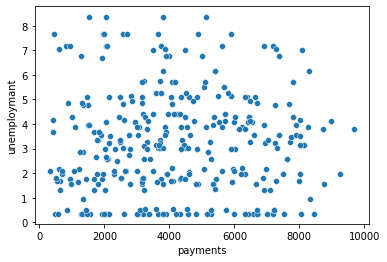

In [63]:
sns.scatterplot(data=temp_all_join_loan_accounts_district, x="payments", y="unemploymant")

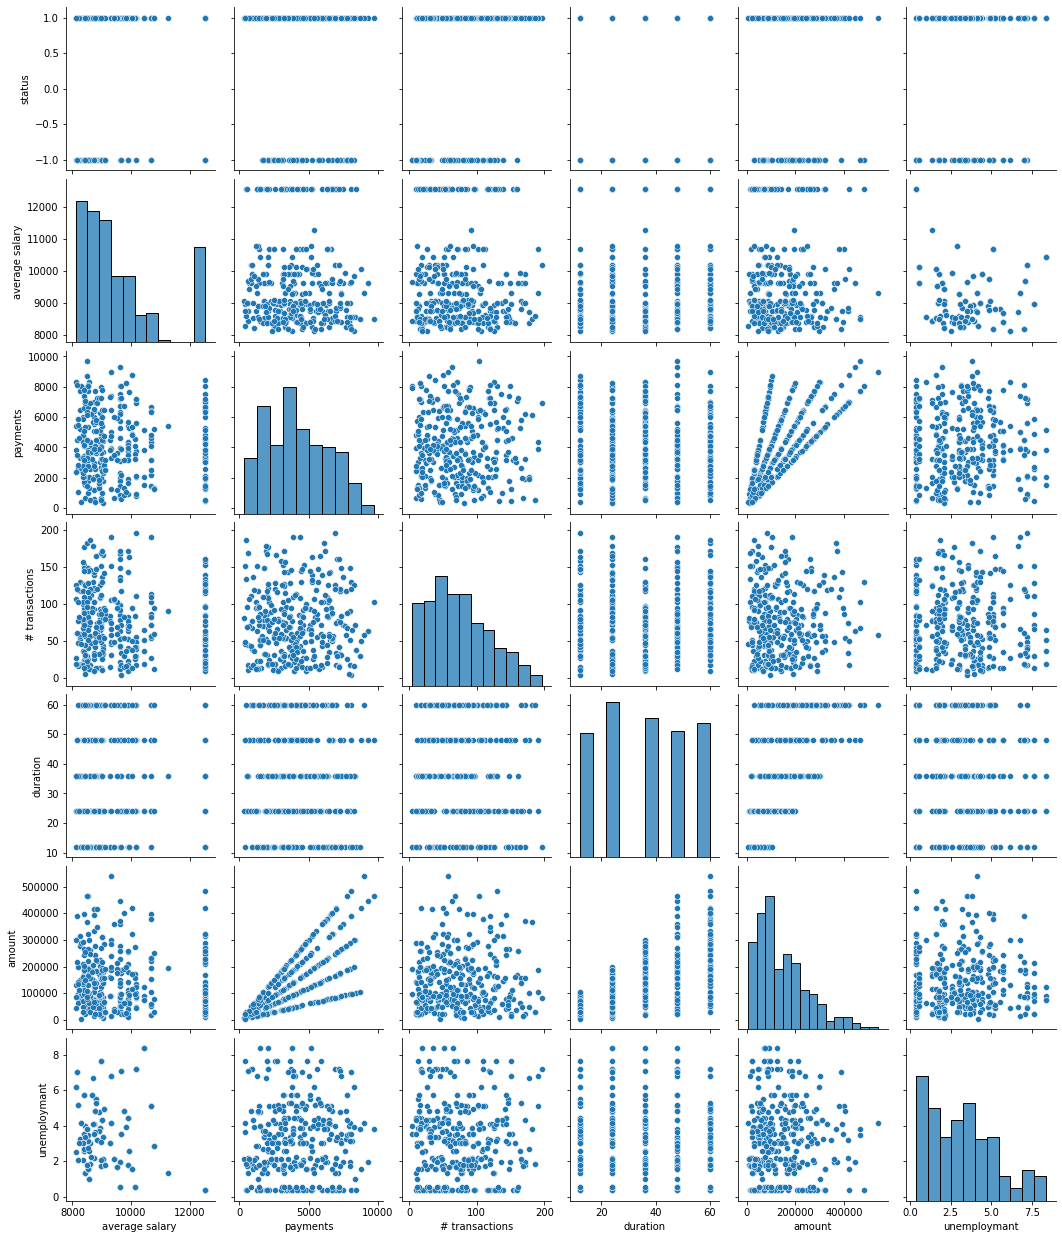

In [64]:
sns.pairplot(
    temp_all_join_loan_accounts_district,
    x_vars=["average salary ", "payments", "# transactions", "duration", "amount", "unemploymant"],
    y_vars=["status", "average salary ", "payments", "# transactions", "duration", "amount", "unemploymant"],
)

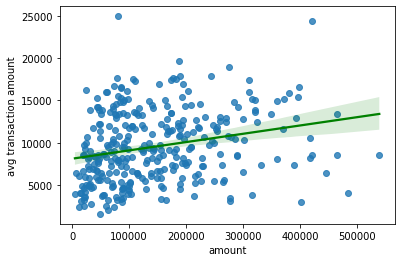

In [65]:
sns.regplot(data=temp_all_join_loan_accounts_district, x='amount', y='avg transaction amount', line_kws={'color': 'g'})